Dataset : https://www.kaggle.com/datasets/laavanya/human-stress-detection-in-and-through-sleep

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install Lib

In [2]:
!pip install sweetviz

     |████████████████████████████████| 15.1 MB 6.5 MB/s 


#Load Data and Preprocessing

In [30]:
import pandas as pd
import numpy as np
import sweetviz as sv

In [4]:
cols = ['snoring_rate',
'respiration_rate',
'body_temperature',
'limb_movement',
'blood_oxygen',
'eye_movement',
'sleeping_hours',
'heart_rate',
'stress_level']

In [6]:
pth="/content/drive/MyDrive/MSIB/06. Classification/"

In [7]:
df = pd.read_csv(pth+"SaYoPillow.csv")
df.columns = cols
df.head()

snoring_rate  respiration_rate  body_temperature  limb_movement  \
0         93.80            25.680            91.840         16.600   
1         91.64            25.104            91.552         15.880   
2         60.00            20.000            96.000         10.000   
3         85.76            23.536            90.768         13.920   
4         48.12            17.248            97.872          6.496   

   blood_oxygen  eye_movement  sleeping_hours  heart_rate  stress_level  
0        89.840         99.60           1.840       74.20             3  
1        89.552         98.88           1.552       72.76             3  
2        95.000         85.00           7.000       60.00             1  
3        88.768         96.92           0.768       68.84             3  
4        96.248         72.48           8.248       53.12             0

In [8]:
df.shape

(630, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   snoring_rate      630 non-null    float64
 1   respiration_rate  630 non-null    float64
 2   body_temperature  630 non-null    float64
 3   limb_movement     630 non-null    float64
 4   blood_oxygen      630 non-null    float64
 5   eye_movement      630 non-null    float64
 6   sleeping_hours    630 non-null    float64
 7   heart_rate        630 non-null    float64
 8   stress_level      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


In [10]:
df.isnull().sum()

snoring_rate        0
respiration_rate    0
body_temperature    0
limb_movement       0
blood_oxygen        0
eye_movement        0
sleeping_hours      0
heart_rate          0
stress_level        0
dtype: int64

In [12]:
df['stress_level'].value_counts()

3    126
1    126
0    126
2    126
4    126
Name: stress_level, dtype: int64

In [13]:
x = df.drop('stress_level',axis=1)
y = df.stress_level

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, train_size = 0.7)
print(x_train.shape, x_test.shape)

(441, 8) (189, 8)


In [19]:
x_train

snoring_rate  respiration_rate  body_temperature  limb_movement  \
580         55.60            19.120            95.120          9.120   
567         94.64            25.904            91.952         16.880   
74          48.68            17.472            98.208          6.944   
504         47.16            16.864            97.296          5.728   
566         80.84            22.224            90.112         12.280   
..            ...               ...               ...            ...   
180         55.20            19.040            95.040          9.040   
170         59.60            19.920            95.920          9.920   
142         78.40            21.840            93.840         11.840   
130         68.80            20.880            92.880         10.880   
391         57.92            19.584            95.584          9.584   

     blood_oxygen  eye_movement  sleeping_hours  heart_rate  
580        93.680         82.80           6.120       57.80  
567        89.952         99.88           1.952       74.76  
74         96.472         74.72           8.472       53.68  
504        95.864         68.64           7.864       52.16  
566        88.112         95.28           0.112       65.56  
..            ...           ...             ...         ...  
180        93.560         82.60           6.040       57.60  
170        94.880         84.80           6.920       59.80  
142        91.840         94.20           4.760       64.60  
130        90.880         89.40           3.320       62.20  
391        94.376         83.96           6.584       58.96  

[441 rows x 8 columns]

#EDA

In [15]:
df_train = pd.DataFrame(x_train, columns=x.columns).reset_index(drop=True)
df_train['stress_level'] = y_train.values
df_train['stress_level'] = df_train['stress_level'].astype('float')

df_test = pd.DataFrame(x_test, columns=x.columns).reset_index(drop=True)
df_test['stress_level'] = y_test.values
df_test['stress_level'] = df_test['stress_level'].astype('float')

In [22]:
print(df_train.shape)
df_train.head()

(441, 9)


snoring_rate  respiration_rate  body_temperature  limb_movement  \
0         55.60            19.120            95.120          9.120   
1         94.64            25.904            91.952         16.880   
2         48.68            17.472            98.208          6.944   
3         47.16            16.864            97.296          5.728   
4         80.84            22.224            90.112         12.280   

   blood_oxygen  eye_movement  sleeping_hours  heart_rate  stress_level  
0        93.680         82.80           6.120       57.80           1.0  
1        89.952         99.88           1.952       74.76           3.0  
2        96.472         74.72           8.472       53.68           0.0  
3        95.864         68.64           7.864       52.16           0.0  
4        88.112         95.28           0.112       65.56           3.0

                                             |          | [  0%]   00:00 -> (? left)


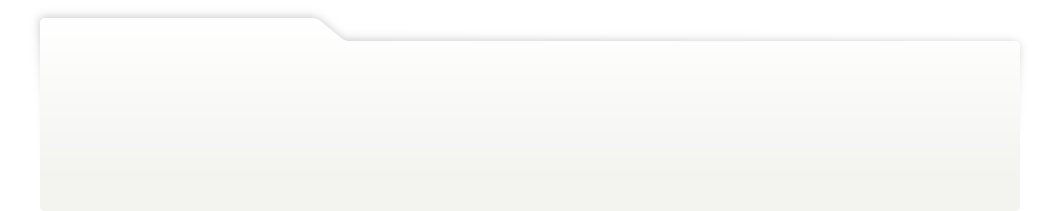
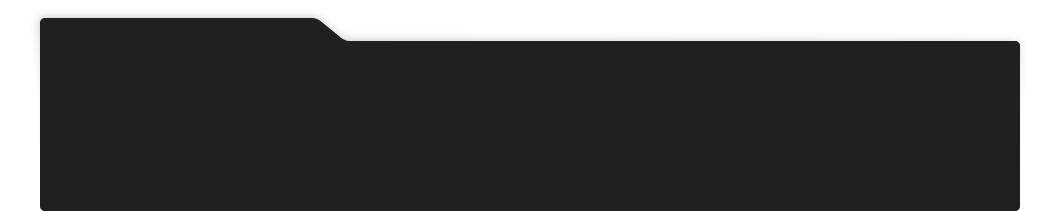
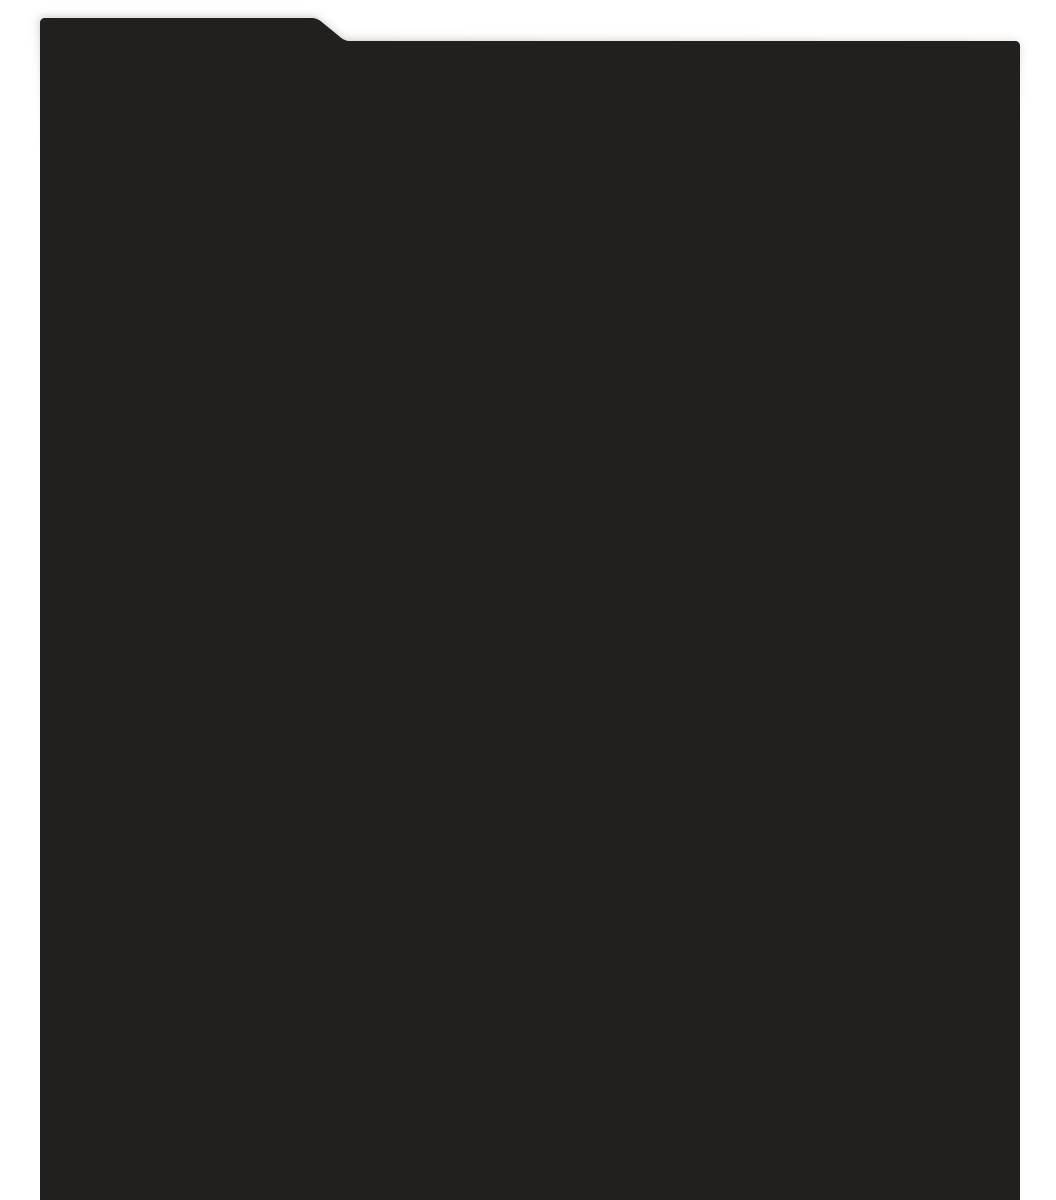
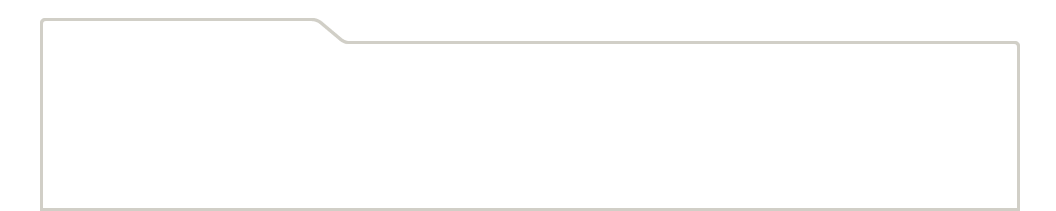
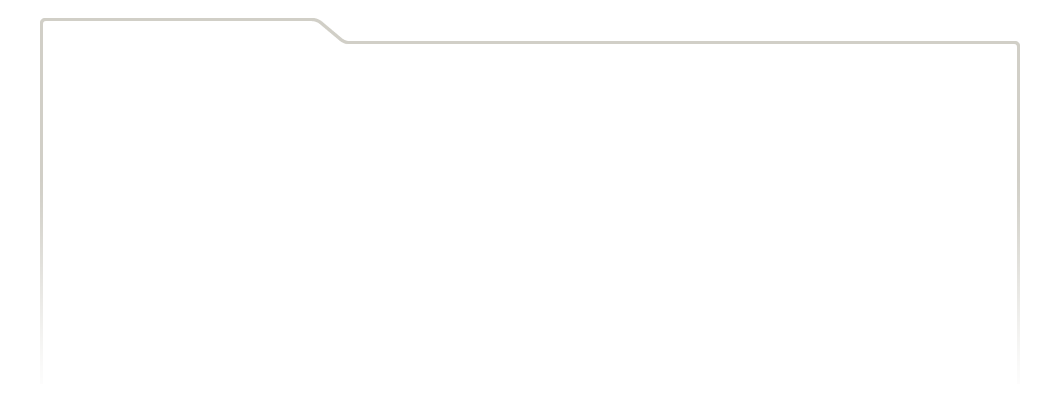
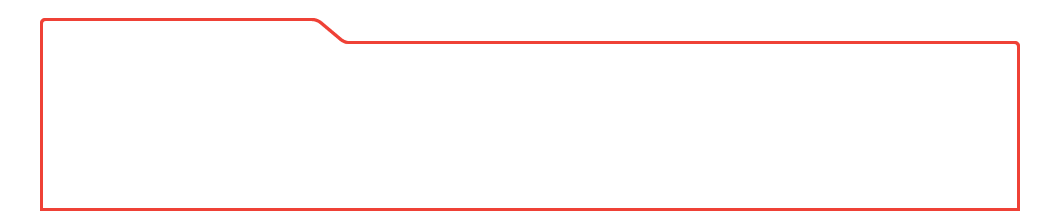
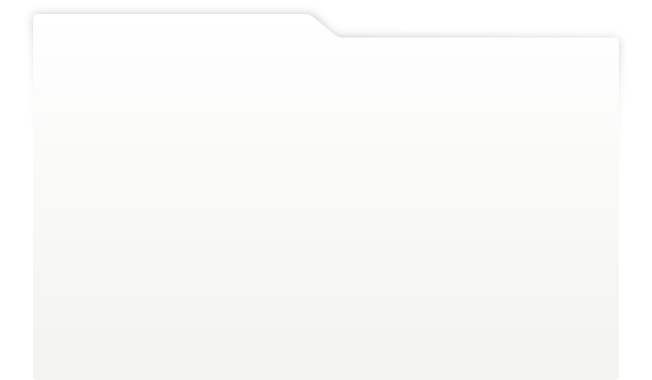
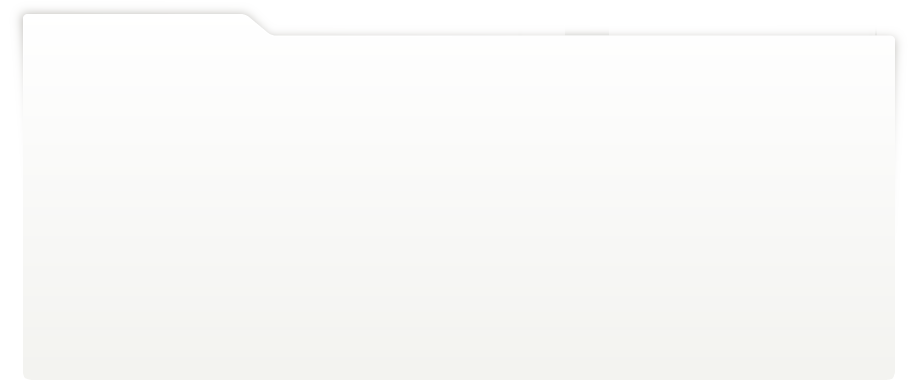
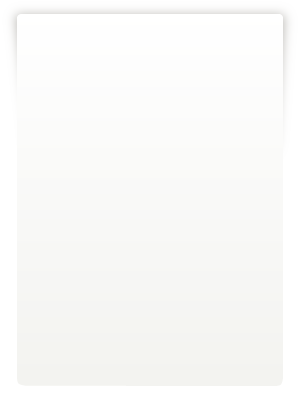
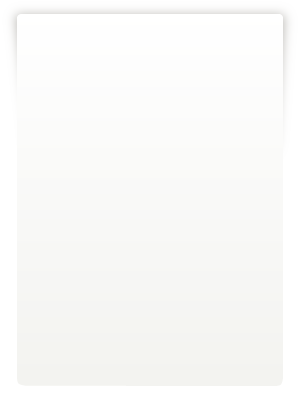
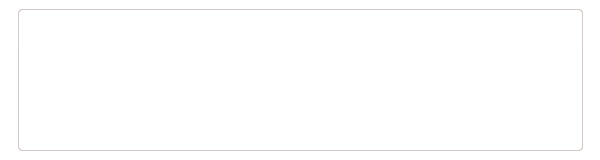
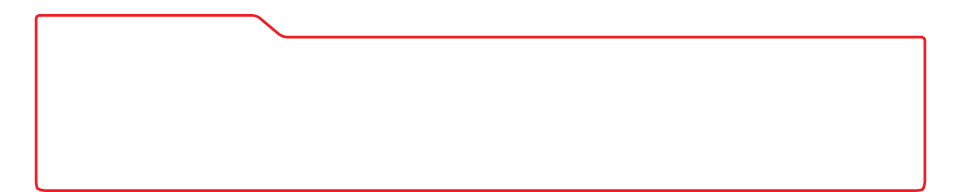
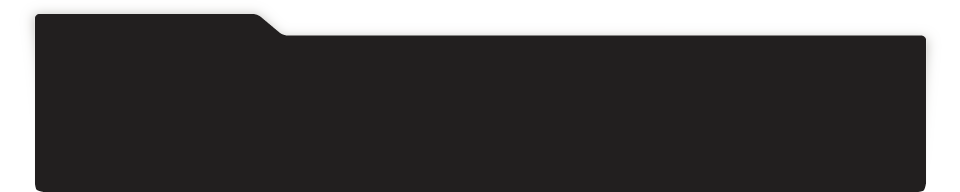
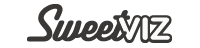
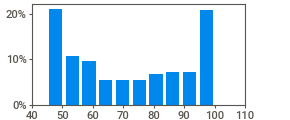
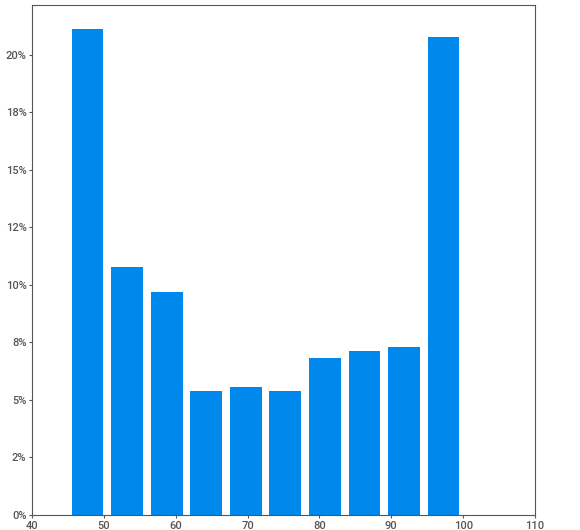
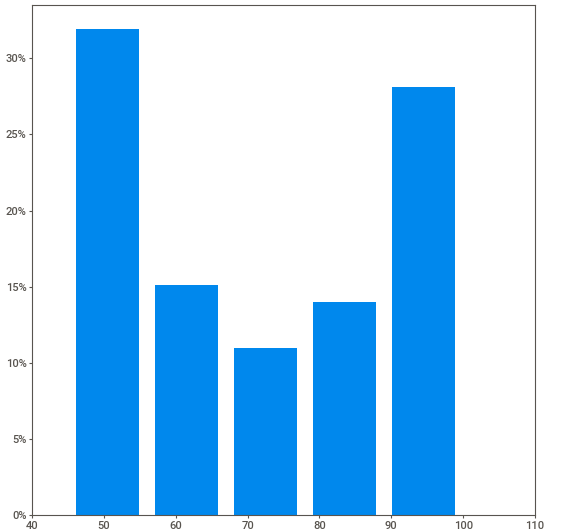
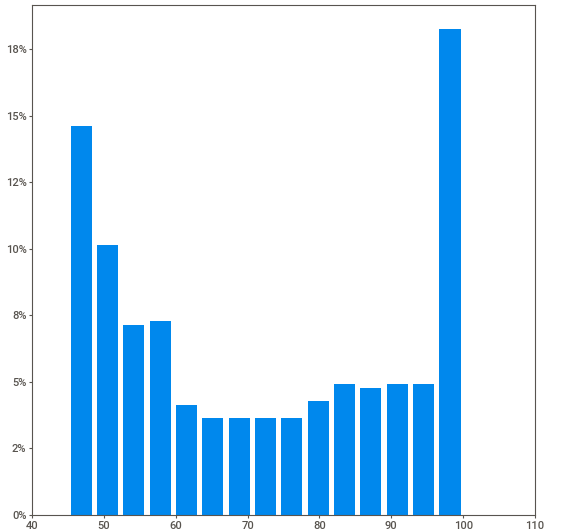
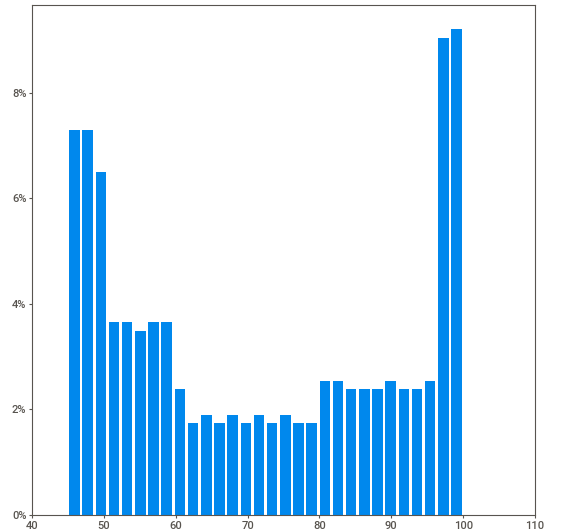
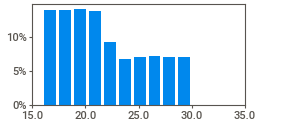
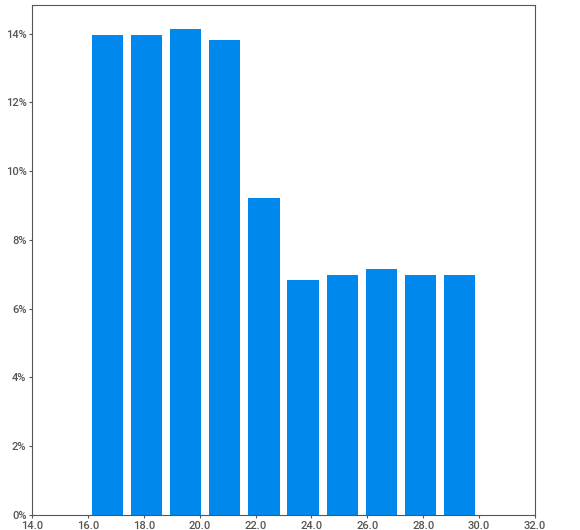
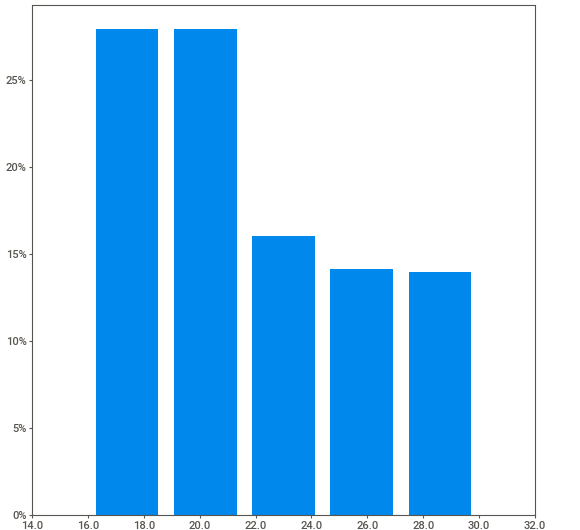
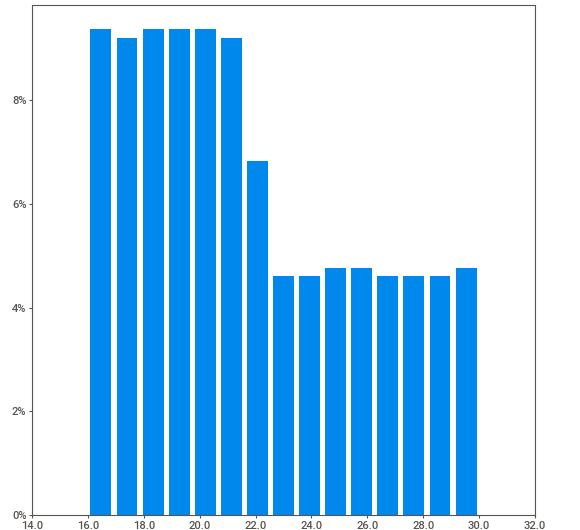
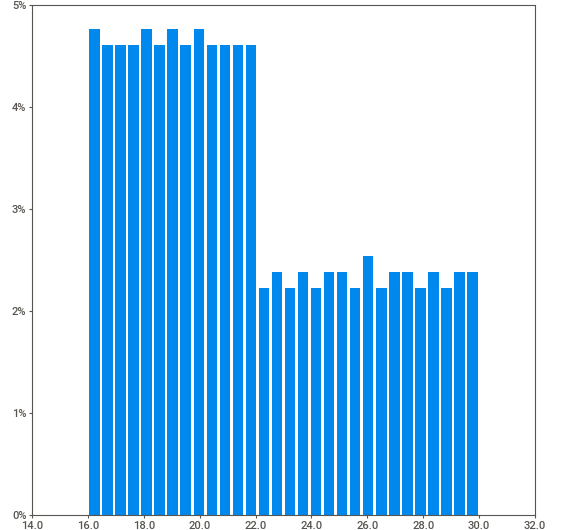
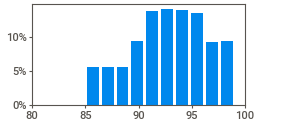
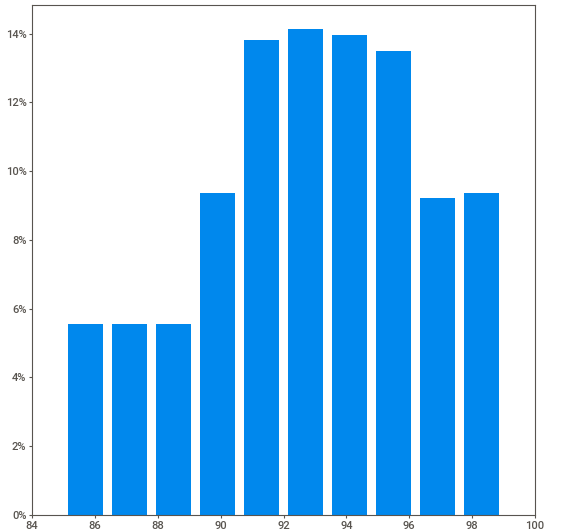
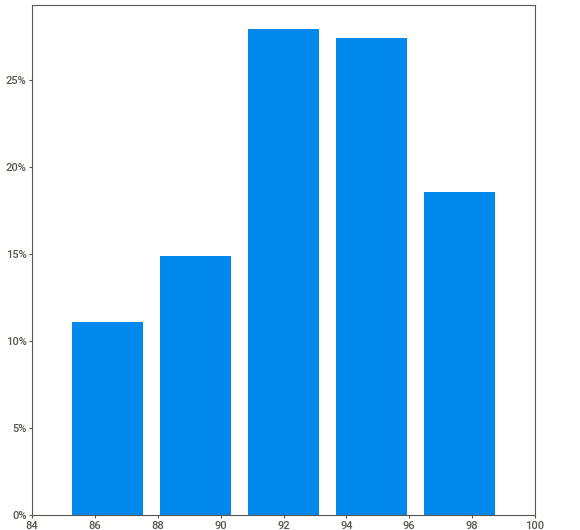
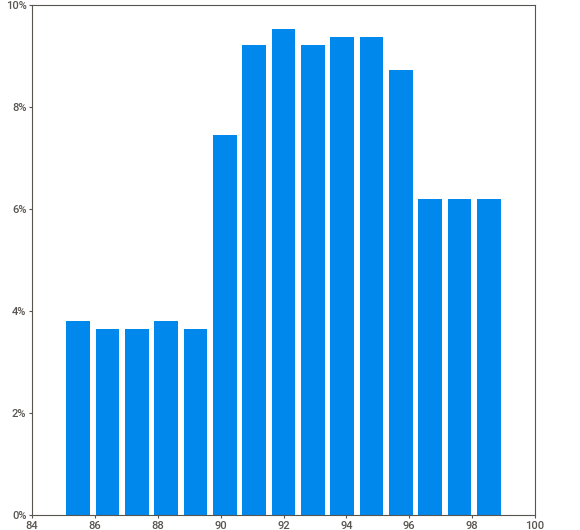
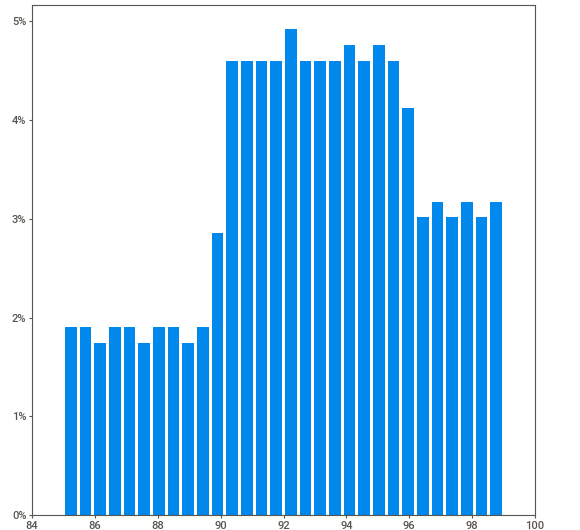
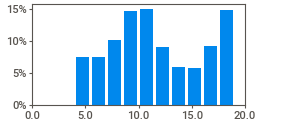
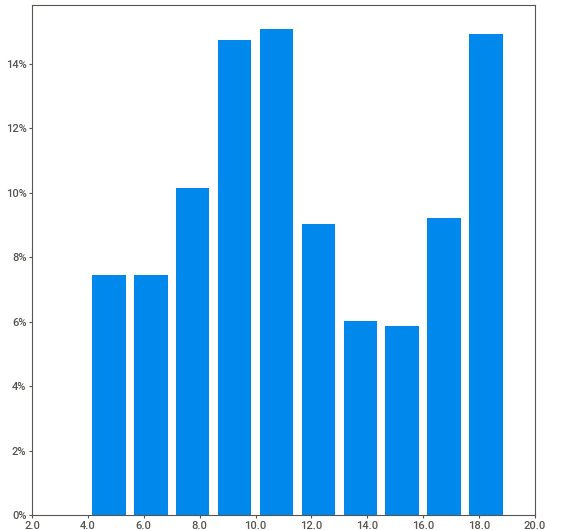
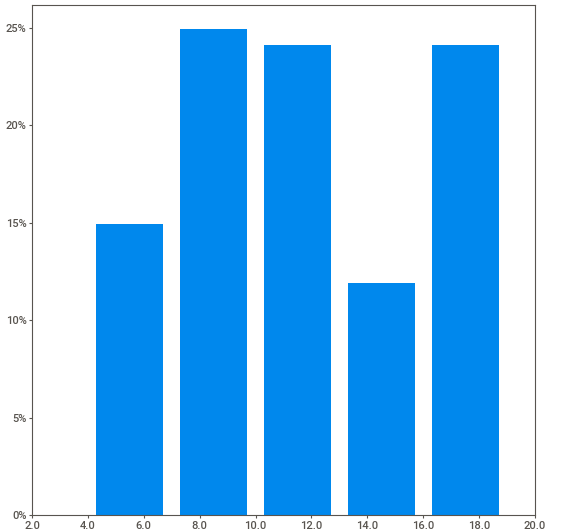
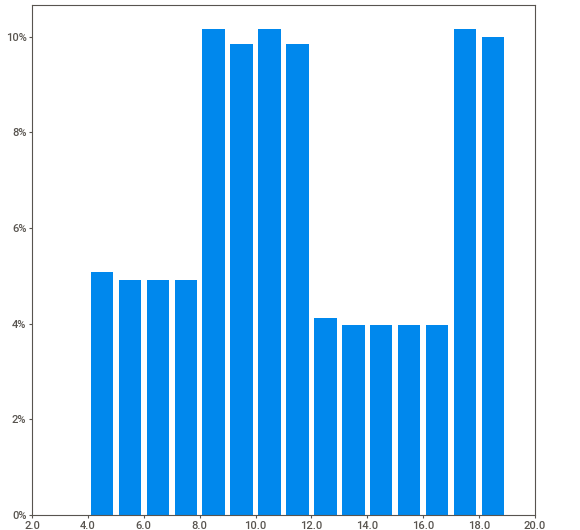
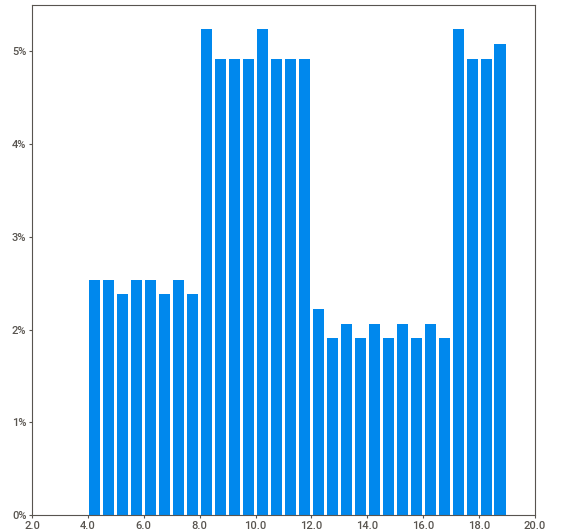
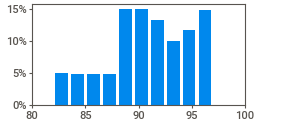
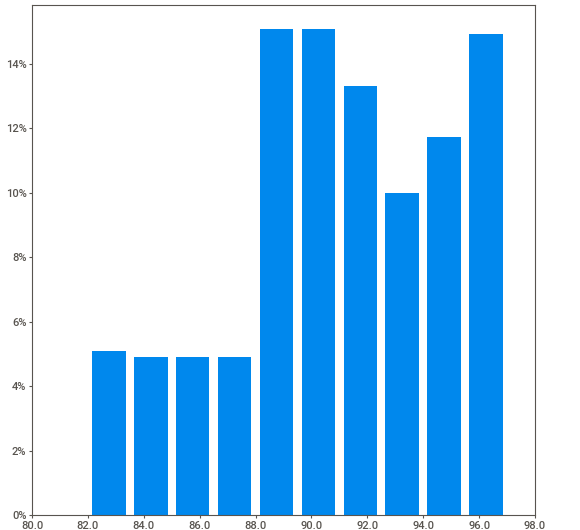
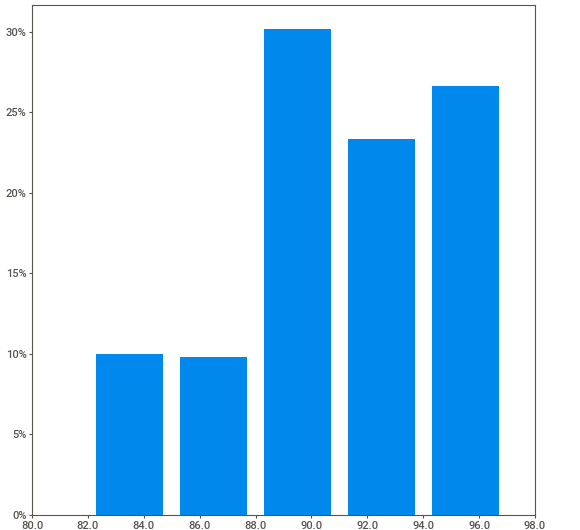
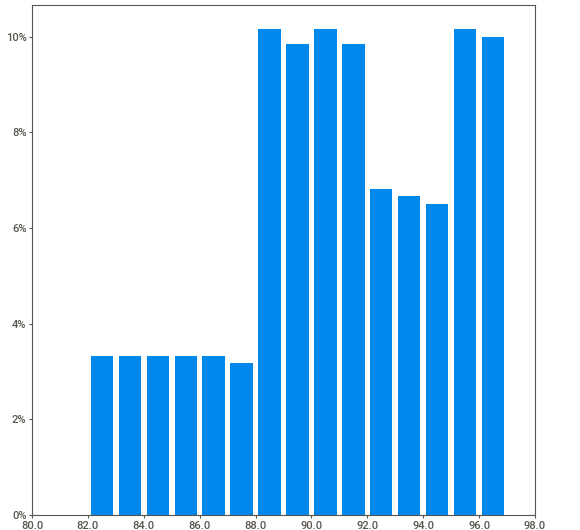
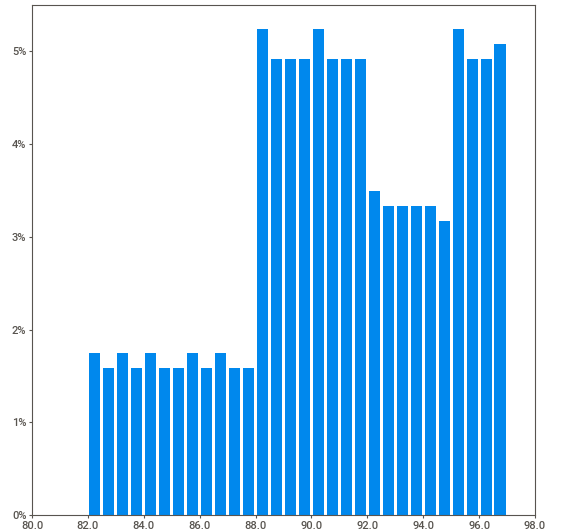
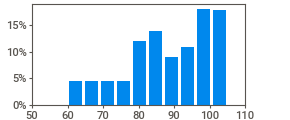
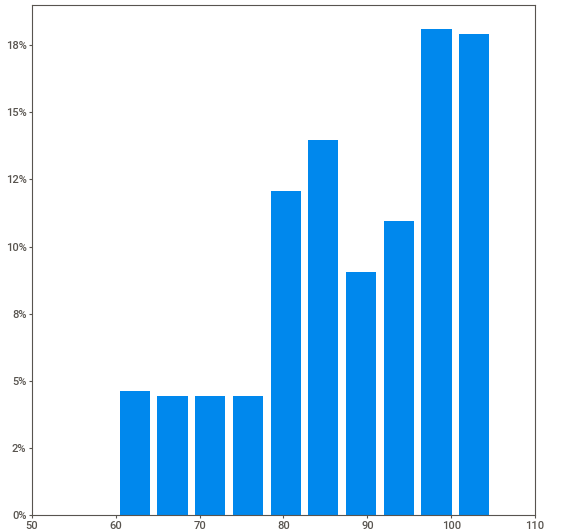
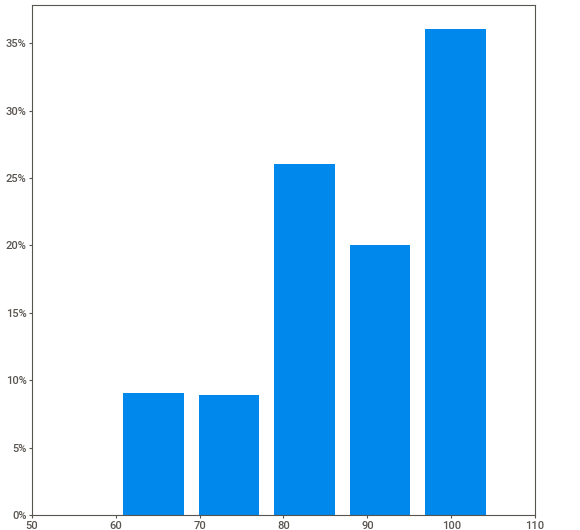
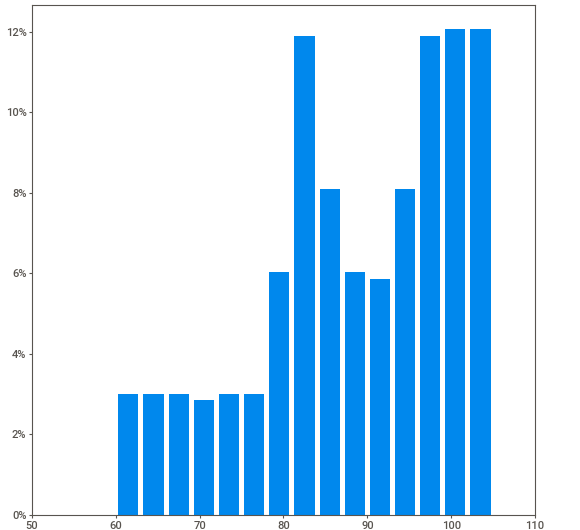
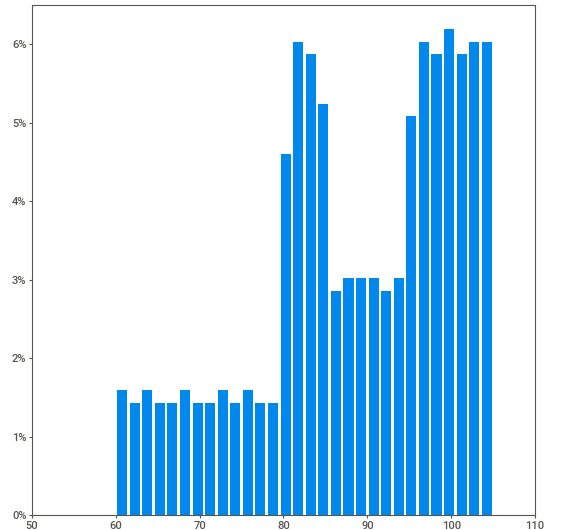
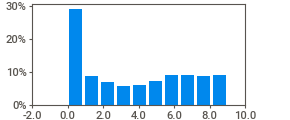
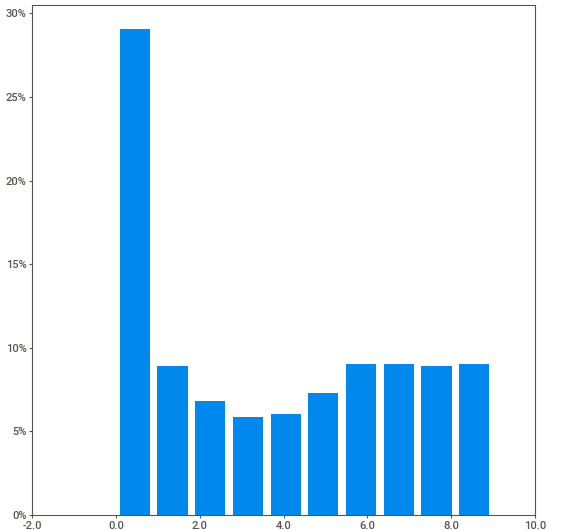
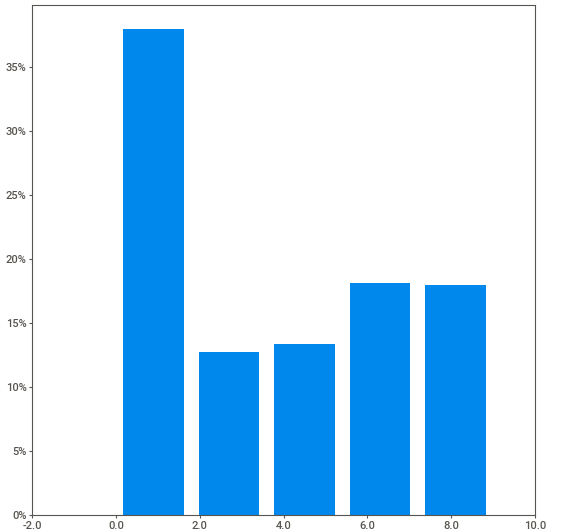
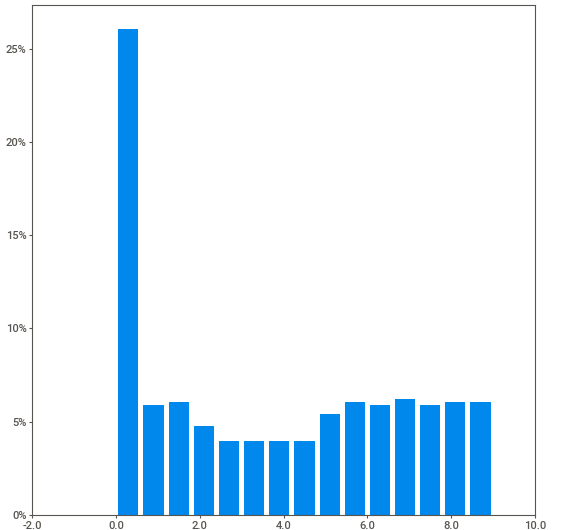
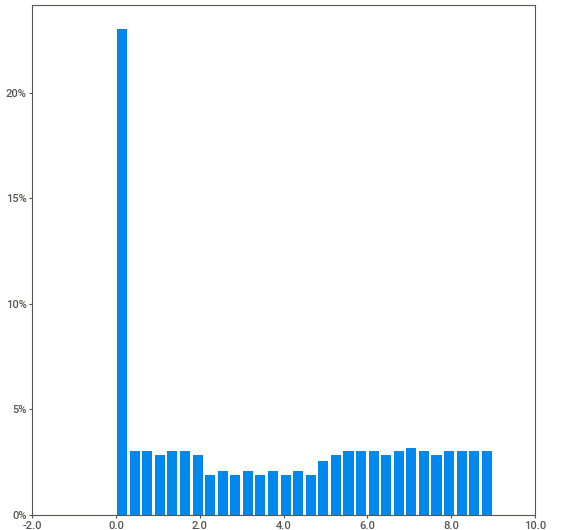
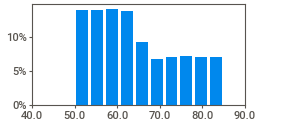
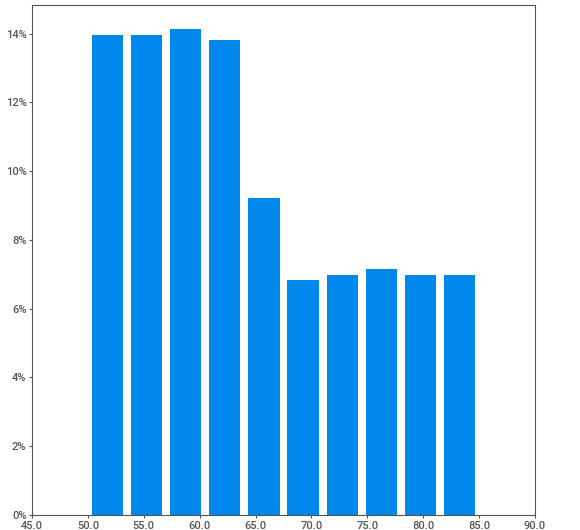
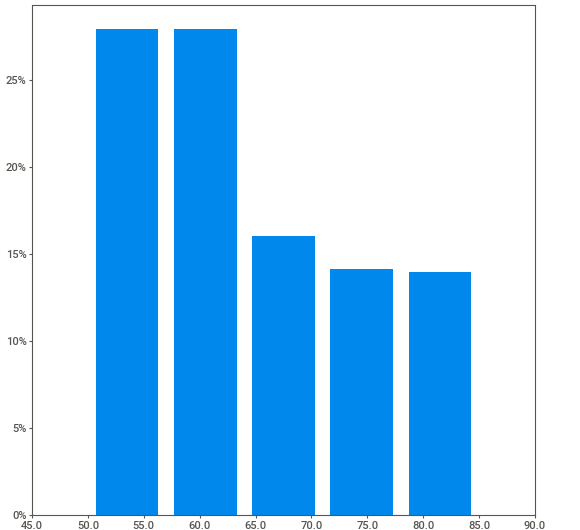
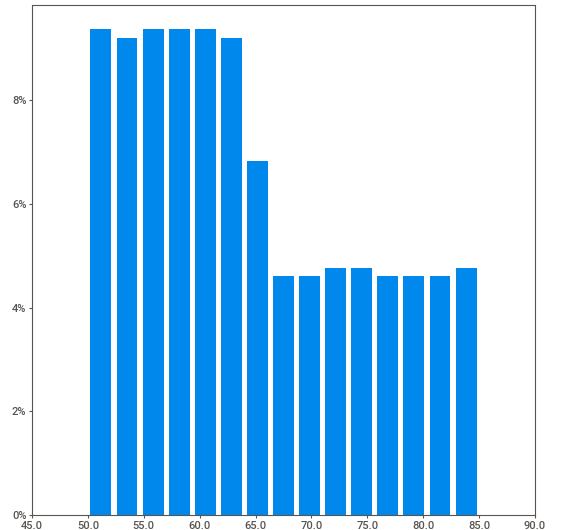
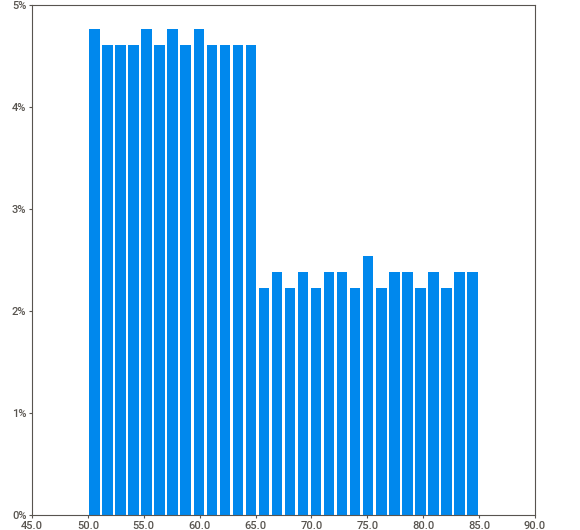
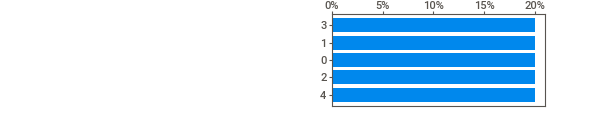
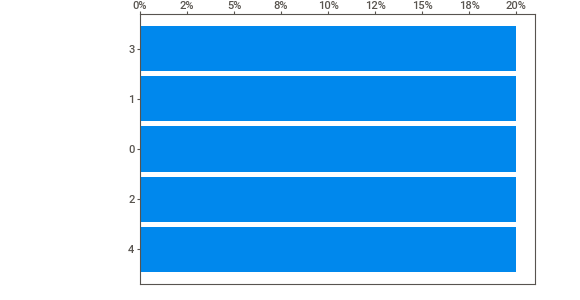
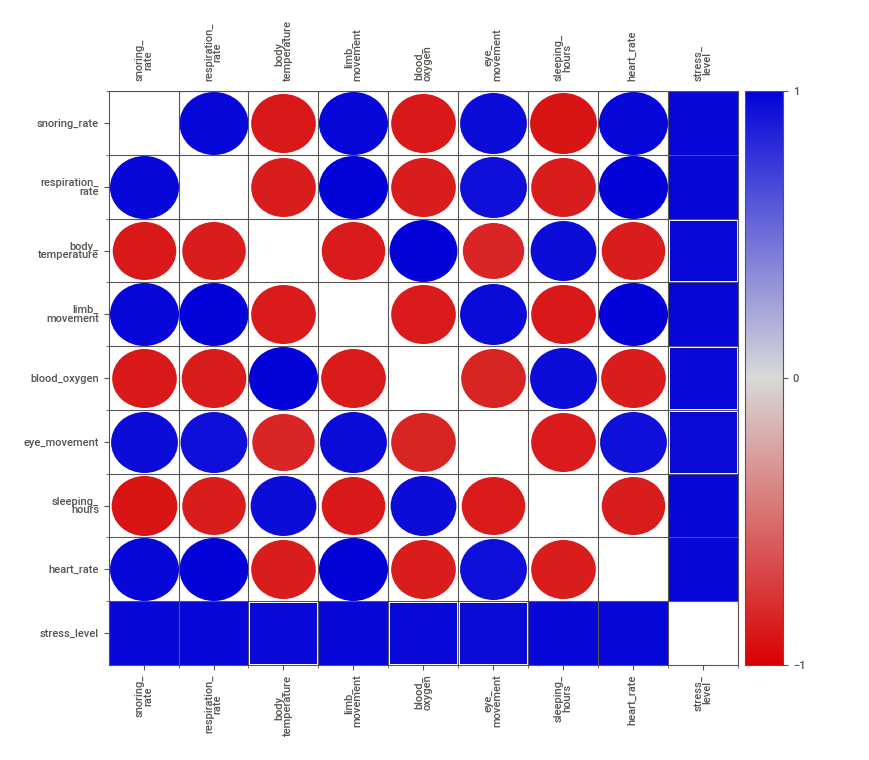
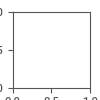

In [16]:
report = sv.analyze(df)
# report.show_html(pth+"report.html")
report.show_notebook()

In [ ]:
feature_config = sv.FeatureConfig(force_num = ["stress_level"])

report = sv.compare([df_train, "Train"], [df_train, "Test"], 'stress_level', feature_config)
report.show_notebook()

Output hidden; open in https://colab.research.google.com to view.

#Modelling

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import pickle

##KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=7)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        34
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        39

    accuracy                           1.00       189
   macro avg       1.00      1.00      1.00       189
weighted avg       1.00      1.00      1.00       189

[[41  0  0  0  0]
 [ 0 34  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  0 32  0]
 [ 0  0  0  0 39]]


In [ ]:
# save the model to disk
filename = pth+'KNN.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

1.0


##DT

In [35]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.94      0.97        34
           2       0.98      1.00      0.99        43
           3       1.00      0.94      0.97        32
           4       0.97      1.00      0.99        39

    accuracy                           0.98       189
   macro avg       0.98      0.98      0.98       189
weighted avg       0.98      0.98      0.98       189

[[41  0  0  0  0]
 [ 2 32  0  0  0]
 [ 0  0 43  0  0]
 [ 0  0  1 30  1]
 [ 0  0  0  0 39]]


In [ ]:
# save the model to disk
filename = pth+'DT.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9841269841269841


##SVM

In [ ]:
from sklearn.svm import SVC

model = SVC()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.98      1.00      0.99        47
           2       1.00      0.97      0.99        37
           3       1.00      1.00      1.00        38
           4       1.00      1.00      1.00        37

    accuracy                           0.99       189
   macro avg       1.00      0.99      1.00       189
weighted avg       0.99      0.99      0.99       189

[[30  0  0  0  0]
 [ 0 47  0  0  0]
 [ 0  1 36  0  0]
 [ 0  0  0 38  0]
 [ 0  0  0  0 37]]


In [ ]:
# save the model to disk
filename = pth+'SVM.sav'
pickle.dump(model, open(filename, 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.9947089947089947
